<a href="https://colab.research.google.com/github/yowlshi/Weather-Classification-Web-App-Machine-Learning-/blob/main/Training%20the%20model%20(Weather%20Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install streamlit

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
import cv2
from PIL import Image
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model,load_model
from keras.callbacks import EarlyStopping,ModelCheckpoint
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, RMSprop
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import  Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
data = '/content/drive/MyDrive/Finals/datasets/Multi-class weather dataset'
classes = ['Cloudy', 'Rain', 'Sunshine', 'Sunrise']
img_size = 256

# **Display of images**

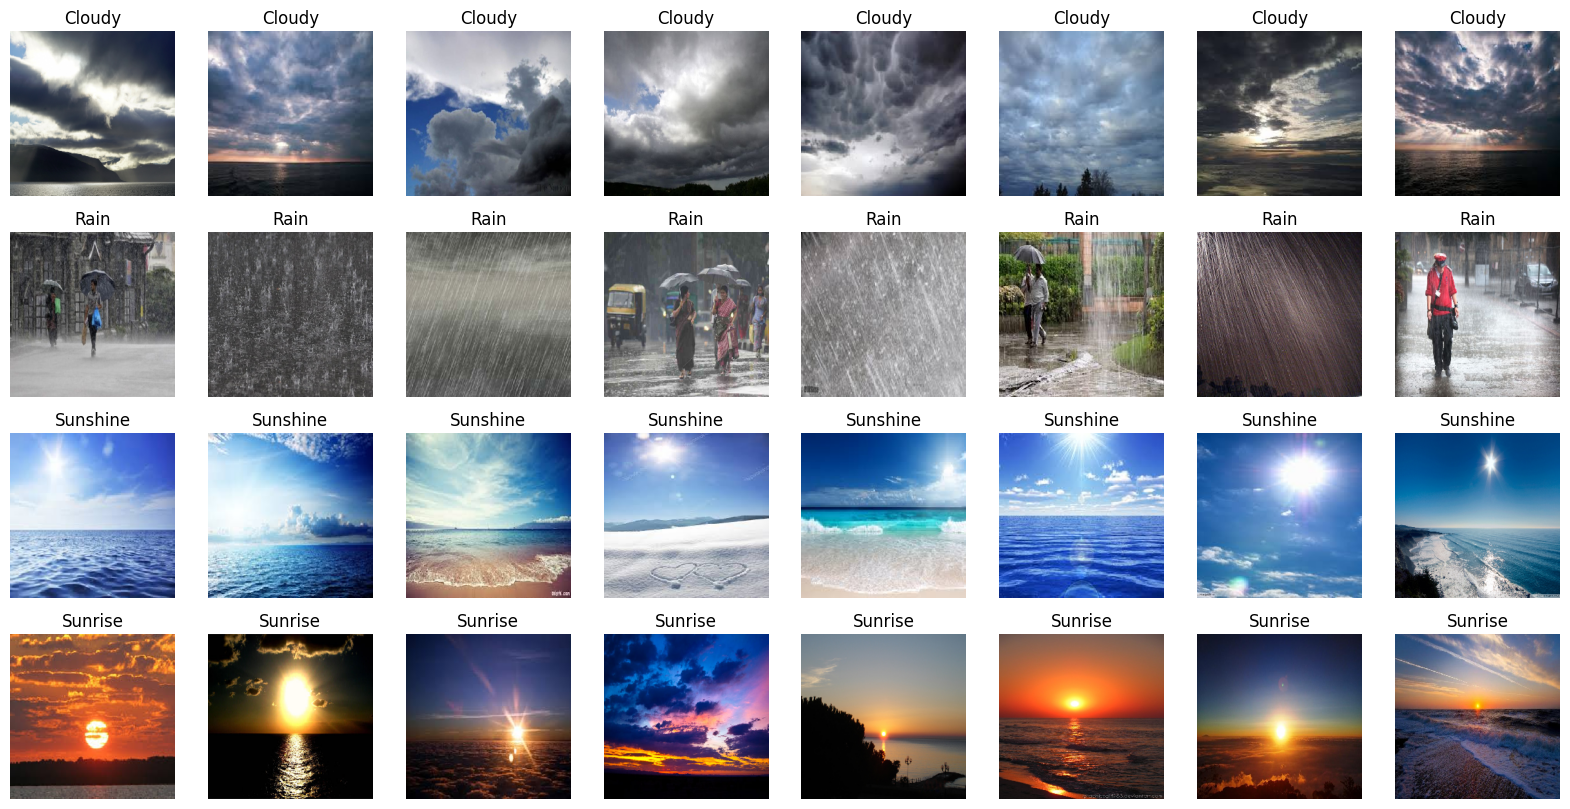

In [ ]:
fig, axes = plt.subplots(nrows=len(classes), ncols=8, figsize=(20, 10))

for rows, category in enumerate(classes):
    category_path = os.path.join(data, category)
    for cols, img_filename in enumerate(os.listdir(category_path)[:8]):
        img_path = os.path.join(category_path, img_filename)
        img = image.load_img(img_path, target_size=(img_size, img_size))
        axes[rows][cols].imshow(img)
        axes[rows][cols].axis('off')
        axes[rows][cols].set_title(category)
plt.show()

# **Train and split test**

In [ ]:
def load_data():
  X = []
  y = []
  for category in classes:
      path = os.path.join(data, category)
      class_num = classes.index(category)
      for img in os.listdir(path):
          try:
            img_array = cv2.imread(os.path.join(path, img))
            new_array = cv2.resize(img_array, (img_size, img_size))
            X.append(new_array)
            y.append(class_num)
          except Exception as e:
            pass
  X = np.array(X)
  y = np.array(y)
  X = X / 255.0
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = load_data()

In [ ]:
X_train, X_test

(array([[[[1.        , 0.98039216, 0.96470588],
          [1.        , 0.98039216, 0.96470588],
          [1.        , 0.98431373, 0.96470588],
          ...,
          [0.99215686, 0.69019608, 0.41176471],
          [0.99607843, 0.69411765, 0.40784314],
          [0.99607843, 0.69411765, 0.40784314]],
 
         [[1.        , 0.98039216, 0.96470588],
          [1.        , 0.98039216, 0.96470588],
          [1.        , 0.98431373, 0.96470588],
          ...,
          [0.99215686, 0.69019608, 0.41176471],
          [0.99607843, 0.69411765, 0.40784314],
          [0.99607843, 0.69411765, 0.40784314]],
 
         [[1.        , 0.98039216, 0.96470588],
          [1.        , 0.98039216, 0.96470588],
          [1.        , 0.98431373, 0.96470588],
          ...,
          [0.99215686, 0.69019608, 0.41176471],
          [0.99607843, 0.69019608, 0.40784314],
          [0.99607843, 0.69411765, 0.40784314]],
 
         ...,
 
         [[0.10980392, 0.6627451 , 0.50196078],
          [0.18039

In [ ]:
y_train, y_test

(array([2, 3, 0, 3, 3, 2, 3, 1, 2, 1, 3, 0, 3, 3, 2, 2, 0, 1, 0, 1, 3, 0,
        0, 2, 0, 3, 1, 3, 3, 3, 0, 2, 1, 3, 0, 3, 2, 3, 3, 2, 3, 1, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 3, 1, 0, 2, 2, 3, 3, 1, 1, 1, 1, 3, 2, 2, 1,
        2, 1, 2, 0, 2, 0, 2, 0, 3, 0, 1, 1, 1, 0, 2, 1, 0, 1, 2, 2, 3, 3,
        2, 0, 1, 3, 2, 3, 0, 2, 3, 3, 2, 2, 2, 0, 0, 0, 1, 1, 3, 1, 3, 3,
        2, 3, 2, 2, 0, 3, 3, 1, 0, 3, 1, 1, 0, 0, 1, 2, 1, 1, 3, 3, 0, 2,
        3, 0, 0, 2, 0, 2, 0, 0, 1, 2, 1, 1, 0, 0, 1, 0, 3, 2, 2, 2, 2, 1,
        2, 1, 1, 0, 1, 3, 3, 0, 0, 3, 3, 1, 2, 2, 0, 0, 3, 0, 3, 0, 1, 0,
        3, 1, 2, 0, 3, 2, 0, 2, 0, 2, 0, 2, 3, 0, 2, 1, 0, 1, 3, 3, 3, 3,
        2, 0, 1, 0, 1, 3, 0, 3, 3, 0, 3, 3, 3, 3, 0, 3, 2, 0, 2, 3, 2, 3,
        0, 3, 0, 2, 1, 2, 0, 1, 2, 2, 2, 3, 1, 3, 3, 2, 3, 2, 3, 2, 2, 2,
        3, 1, 2, 3, 3, 0, 0, 3, 3, 0, 3, 0, 0, 1, 3, 3, 3, 2, 0, 1, 0, 3,
        2, 2, 1, 1, 3, 2, 2, 3, 3, 3, 0, 1, 1, 1, 1, 3, 1, 3, 3, 2, 3, 3,
        0, 0, 1, 0, 2, 0, 3, 0, 2, 3, 

In [ ]:
print("Feature matrix:", X_train.shape)
print("Target matrix:", X_test.shape)
print("Feature matrix:", y_train.shape)
print("Target matrix:", y_test.shape)

Feature matrix: (898, 256, 256, 3)
Target matrix: (225, 256, 256, 3)
Feature matrix: (898,)
Target matrix: (225,)


# **Baseline MLP Classification model**



In [ ]:
model = keras.Sequential()
model.add(Flatten(input_shape=(img_size, img_size, 3)))
model.add(tf.keras.layers.Rescaling(1./255))
model.add(Dense(132, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))

In [ ]:
#Compile the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=20, validation_data=(X_test, y_test), verbose=1)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose =2)

print('Loss:', test_loss)
print('Accuracy:', test_accuracy)

Epoch 1/10
45/45 [==============================] - 23s 495ms/step - loss: 0.3895 - accuracy: 0.8563 - val_loss: 0.5077 - val_accuracy: 0.7733
Epoch 2/10
45/45 [==============================] - 25s 554ms/step - loss: 0.3601 - accuracy: 0.8608 - val_loss: 0.4463 - val_accuracy: 0.7911
Epoch 3/10
45/45 [==============================] - 23s 524ms/step - loss: 0.3404 - accuracy: 0.8675 - val_loss: 0.5415 - val_accuracy: 0.7822
Epoch 4/10
45/45 [==============================] - 23s 493ms/step - loss: 0.3366 - accuracy: 0.8619 - val_loss: 0.5421 - val_accuracy: 0.7733
Epoch 5/10
45/45 [==============================] - 22s 481ms/step - loss: 0.3306 - accuracy: 0.8708 - val_loss: 0.5189 - val_accuracy: 0.7644
Epoch 6/10
45/45 [==============================] - 23s 509ms/step - loss: 0.3260 - accuracy: 0.8719 - val_loss: 0.4365 - val_accuracy: 0.8222
Epoch 7/10
45/45 [==============================] - 22s 479ms/step - loss: 0.2847 - accuracy: 0.8976 - val_loss: 0.4976 - val_accuracy: 0.7733

In [ ]:
overall_accuracy = test_accuracy * 100
print(f'Overall Accuracy: {overall_accuracy:.2f}%')

Overall Accuracy: 80.00%


# **Improving the accuracy of your baseline model using known technique**

In [ ]:
model = keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(4, activation='softmax'))


In [ ]:
#Compile the Model
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.fit(X_train, tf.keras.utils.to_categorical(y_train), epochs=10, batch_size=20, validation_data=(X_test, tf.keras.utils.to_categorical(y_test)))

scores = model.evaluate(X_train, tf.keras.utils.to_categorical(y_train), verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


Epoch 1/10
45/45 [==============================] - 138s 3s/step - loss: 1.1777 - accuracy: 0.5011 - val_loss: 0.7413 - val_accuracy: 0.7378
Epoch 2/10
45/45 [==============================] - 134s 3s/step - loss: 0.7604 - accuracy: 0.6927 - val_loss: 0.5203 - val_accuracy: 0.7867
Epoch 3/10
45/45 [==============================] - 138s 3s/step - loss: 0.6346 - accuracy: 0.7572 - val_loss: 0.4295 - val_accuracy: 0.8489
Epoch 4/10
45/45 [==============================] - 133s 3s/step - loss: 0.5937 - accuracy: 0.7884 - val_loss: 0.4262 - val_accuracy: 0.8533
Epoch 5/10
45/45 [==============================] - 133s 3s/step - loss: 0.5602 - accuracy: 0.8107 - val_loss: 0.3842 - val_accuracy: 0.8267
Epoch 6/10
45/45 [==============================] - 132s 3s/step - loss: 0.4997 - accuracy: 0.8241 - val_loss: 0.3993 - val_accuracy: 0.8711
Epoch 7/10
45/45 [==============================] - 143s 3s/step - loss: 0.3897 - accuracy: 0.8708 - val_loss: 0.3610 - val_accuracy: 0.8844
Epoch 8/10
45

# **Saving the best model**

In [ ]:
pip install h5py

In [ ]:
# Save the model
model.save('model3.h5')


In [ ]:
# JSON and HD5
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense
import numpy
import os

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights('/content/drive/MyDrive/Finals/Models/model.h5')
print("Saved model to disk")

# later...
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights('/content/drive/MyDrive/Finals/Models/model.h5')
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                     optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X_train, tf.keras.utils.to_categorical(y_train), verbose=1)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Saved model to disk
Loaded model from disk
29/29 [==============================] - 57s 2s/step - loss: 0.2176 - accuracy: 0.9354
accuracy: 93.54%


In [ ]:
# YAML and HD5

# serialize model to YAML
model_yaml = model.to_json()
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
model.save_weights('/content/drive/MyDrive/Finals/Models/model_yaml2.h5')
print("Saved model to disk")

# later...

# load YAML and create model
yaml_file = open('model.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_json(loaded_model_yaml)
# load weights into new model
loaded_model.load_weights('/content/drive/MyDrive/Finals/Models/model_yaml2.h5')
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X_train, tf.keras.utils.to_categorical(y_train), verbose=1)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Saved model to disk
Loaded model from disk
29/29 [==============================] - 37s 1s/step - loss: 0.2983 - accuracy: 0.9354
accuracy: 93.54%


In [ ]:
from tensorflow.keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

In [ ]:
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense
import numpy
import os

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights('/content/drive/MyDrive/Finals/Models/model.h5')
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                     optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X_train, tf.keras.utils.to_categorical(y_train), verbose=1)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
29/29 [==============================] - 36s 1s/step - loss: 0.2176 - accuracy: 0.9354
accuracy: 93.54%


# **SUNRISE**

In [ ]:
imgloc = '/content/drive/MyDrive/Finals/datasets/Multi-class weather dataset/Sunrise/sunrise100.jpg'
img = image.load_img(imgloc, target_size=(img_size, img_size, 3))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [ ]:
predict = loaded_model.predict(x)
class_prediction = np.argmax(predict, axis=-1)

class_mapping = {
    0: 'Cloudy',
    1: 'Rain',
    2: 'Sunshine',
    3: 'Sunrise'
}

1/1 [==============================] - 0s 60ms/step


Class Prediction: Sunrise


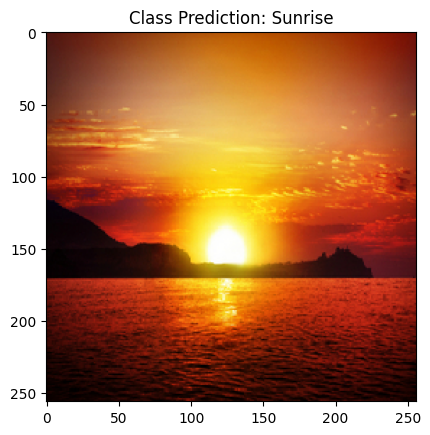

In [ ]:
print('Class Prediction:', class_mapping[class_prediction[0]])
plt.imshow(img)
plt.title('Class Prediction: ' + class_mapping[class_prediction[0]])
plt.show()

# **CLOUDY**

In [ ]:
imgloc = '/content/drive/MyDrive/Finals/datasets/Multi-class weather dataset/Cloudy/cloudy50.jpg'
img = image.load_img(imgloc, target_size=(img_size, img_size, 3))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [ ]:
predict = loaded_model.predict(x)
class_prediction = np.argmax(predict, axis=-1)

class_mapping = {
    0: 'Cloudy',
    1: 'Rain',
    2: 'Sunshine',
    3: 'Sunrise'
}

1/1 [==============================] - 0s 63ms/step


Class Prediction: Sunshine


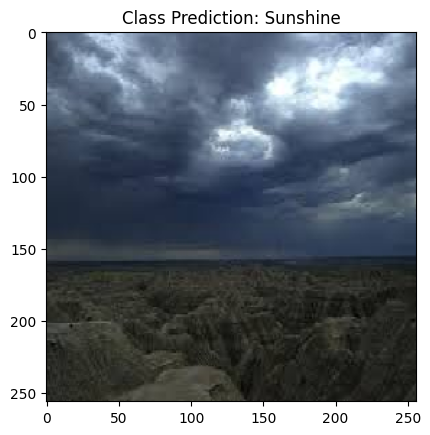

In [ ]:
print('Class Prediction:', class_mapping[class_prediction[0]])
plt.imshow(img)
plt.title('Class Prediction: ' + class_mapping[class_prediction[0]])
plt.show()

# **SUNSHINE**

In [ ]:
imgloc = '/content/drive/MyDrive/Finals/datasets/Multi-class weather dataset/Sunshine/shine23.jpg'
img = image.load_img(imgloc, target_size=(img_size, img_size, 3))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [ ]:
predict = loaded_model.predict(x)
class_prediction = np.argmax(predict, axis=-1)

class_mapping = {
    0: 'Cloudy',
    1: 'Rain',
    2: 'Shine',
    3: 'Sunrise'
}

1/1 [==============================] - 0s 40ms/step


Class Prediction: Shine


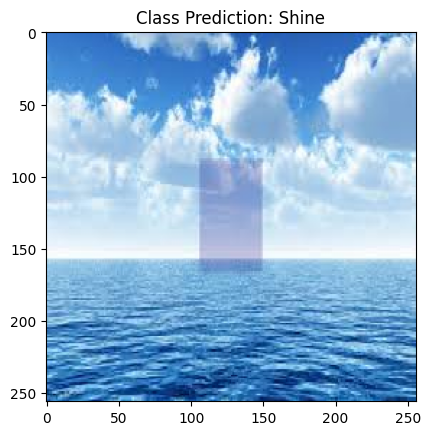

In [ ]:
print('Class Prediction:', class_mapping[class_prediction[0]])
plt.imshow(img)
plt.title('Class Prediction: ' + class_mapping[class_prediction[0]])
plt.show()

# **RAINING**

In [ ]:
imgloc = '/content/drive/MyDrive/Finals/datasets/Multi-class weather dataset/Rain/rain100.jpg'
img = image.load_img(imgloc, target_size=(img_size, img_size, 3))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [ ]:
predict = loaded_model.predict(x)
class_prediction = np.argmax(predict, axis=-1)
class_mapping = {
    0: 'Cloudy',
    1: 'Rain',
    2: 'Shine',
    3: 'Sunrise'
}

1/1 [==============================] - 0s 35ms/step


Class Prediction: Rain


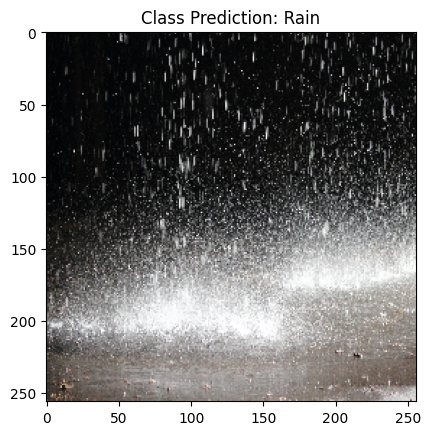

In [ ]:
print('Class Prediction:', class_mapping[class_prediction[0]])
plt.imshow(img)
plt.title('Class Prediction: ' + class_mapping[class_prediction[0]])
plt.show()